# Part1: A/B Hypothesis testing

In [29]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

Null Hypothesis: Logo B is NOT better then logo A.

In [5]:
smaller_significance = 0.01
success_cnts = np.array([500, 550])
total_cnts = np.array([1000, 1000])
test_stat, pval = proportions_ztest(count=success_cnts, nobs=total_cnts, alternative='two-sided')
print('Two sided z-test: z = {:.4f}, p value = {:.4f}'.format(test_stat, pval))

if (pval < smaller_significance):
    print('We reject the null hypothesis')
else:
    print('We are unable to reject the null hypothesis. There is not enough info to make a conclusion either way')


Two sided z-test: z = -2.2389, p value = 0.0252
We are unable to reject the null hypothesis. There is not enough info to make a conclusion either way


In [6]:
larger_significance = 0.05
success_cnts = np.array([500, 550])
total_cnts = np.array([1000, 1000])
test_stat, pval = proportions_ztest(count=success_cnts, nobs=total_cnts, alternative='two-sided')
print('Two sided z-test: z = {:.4f}, p value = {:.4f}'.format(test_stat, pval))
if (pval < larger_significance):
    print('We reject the null hypothesis')
else:
    print('We are unable to reject the null hypothesis')

Two sided z-test: z = -2.2389, p value = 0.0252
We reject the null hypothesis


In [9]:
# Increase to 560 and 570:
success_cnts = np.array([500, 560])
total_cnts = np.array([1000, 1000])
test_stat, pval = proportions_ztest(count=success_cnts, nobs=total_cnts, alternative='two-sided')
print('The p value with b as 560 is now = {:.4f}'.format(pval))

success_cnts = np.array([500, 570])
total_cnts = np.array([1000, 1000])
test_stat, pval = proportions_ztest(count=success_cnts, nobs=total_cnts, alternative='two-sided')
print('The p value with b as 570 is now = {:.4f}'.format(pval))


The p value with b as 560 is now = 0.0072
The p value with b as 570 is now = 0.0017


# Part 2: Regression of real estate data

## Task 1: Import the data

In [11]:
dataframeOne = pd.read_csv('realEstate1.csv')
dataframeTwo = pd.read_csv('realEstate2.csv')
combinedData = pd.concat([dataframeOne, dataframeTwo])

## Task 2: Clean the Data

In [37]:
# Only keep houses with List Price between 200,000 and 1,000,000 dollars
# Remove columns that you don't think contribute to the value of the house.
# Check the datatypes and convert any numbers that were read as strings to numerical values.
# Remove the listings with erroneous 'Longitude' (one has Longitude = 0) and 'Taxes' values (at least two have unreasonably large values).


combinedData = combinedData[(combinedData['LstPrice'] >= 200000) & (combinedData['LstPrice'] <= 1000000)]
relData = combinedData[ ['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'LstPrice', 'Patio', 'PkgSpacs', 'PropType', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']].copy()

relData['TotSqf'] = relData['TotSqf'].str.replace(',', '').astype(int)
newColData = []
for i in relData['PropType']:
    if i != 'Single Family':
        newColData.append(0)
    else:
        newColData.append(1)
        
relData['Prop_Type_SingleFamily'] = newColData
relData = relData[(relData['Longitude'] != 0)]
relData = relData[(relData['Taxes'] >= 100) & (relData['Taxes'] <= 10000)]
# display(relData)





## Task 3: Exploratory data analysis

In [14]:
#Explore the dataset. Write a short description of the dataset describing the number of items, 
#the number of variables and check to see if the values are reasonable.

print('Number of items:', len(relData))
print('Number of variables:', 16)
print('the values appear to be reasonable after the cleaning of data done in the task above!')

print(relData.describe())

Number of items: 259
Number of variables: 16
the values appear to be reasonable after the cleaning of data done in the task above!
            Acres        Deck    GaragCap    Latitude   Longitude  \
count  259.000000  259.000000  259.000000  259.000000  259.000000   
mean     0.130849    0.745174    1.274131   40.777510 -111.875717   
std      0.123934    1.243871    0.975547    0.005826    0.014001   
min      0.000000    0.000000    0.000000   40.769424 -111.913645   
25%      0.045000    0.000000    0.000000   40.772402 -111.886605   
50%      0.110000    1.000000    1.000000   40.775774 -111.874094   
75%      0.160000    1.000000    2.000000   40.782083 -111.866080   
max      0.690000   16.000000    5.000000   40.791059 -111.843083   

             LstPrice       Patio    PkgSpacs      SoldPrice        Taxes  \
count      259.000000  259.000000  259.000000     259.000000   259.000000   
mean    464304.876448    0.837838    1.034749  451508.648649  3041.065637   
std     200229.5

PropType
Single Family    194
Condo             58
Townhouse          7
Name: count, dtype: int64


Text(0, 0.5, 'Count')

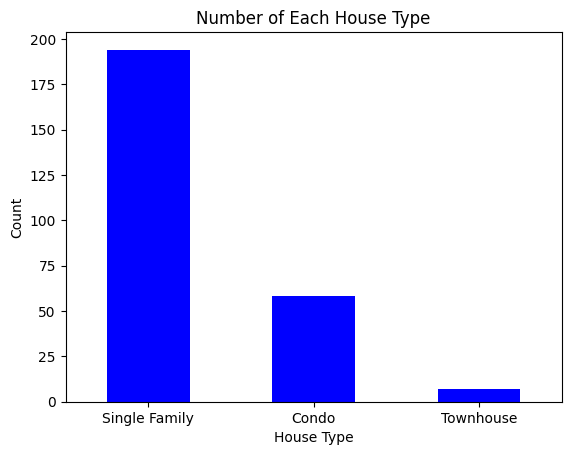

In [15]:
# Make a bar chart showing the breakdown of the different types of houses (single family, townhouse, condo).
houseType = relData['PropType'].value_counts()
print(houseType)
ax = houseType.plot.bar(rot=0, color='b', title="Number of Each House Type")
ax.set_xlabel("House Type")
ax.set_ylabel("Count")

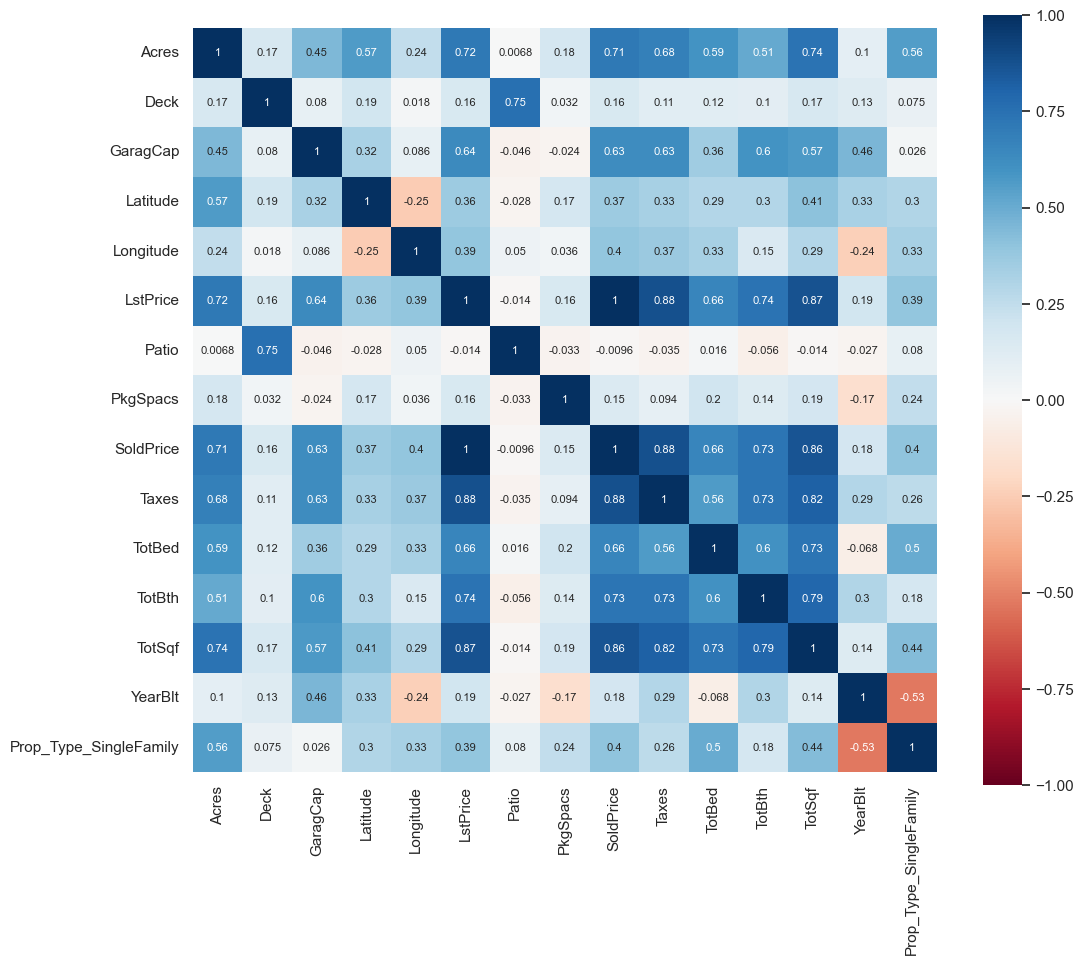

In [16]:
# Compute the correlation matrix and use a heat map to visualize the correlation coefficients.

subset_df = relData[['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'LstPrice', 'Patio', 'PkgSpacs', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt', 'Prop_Type_SingleFamily']]
sns.set(rc = {'figure.figsize':(12, 10)})
heatmap = sns.heatmap(subset_df.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True, annot_kws={'fontsize':8, 'fontweight':'normal'},square=True)


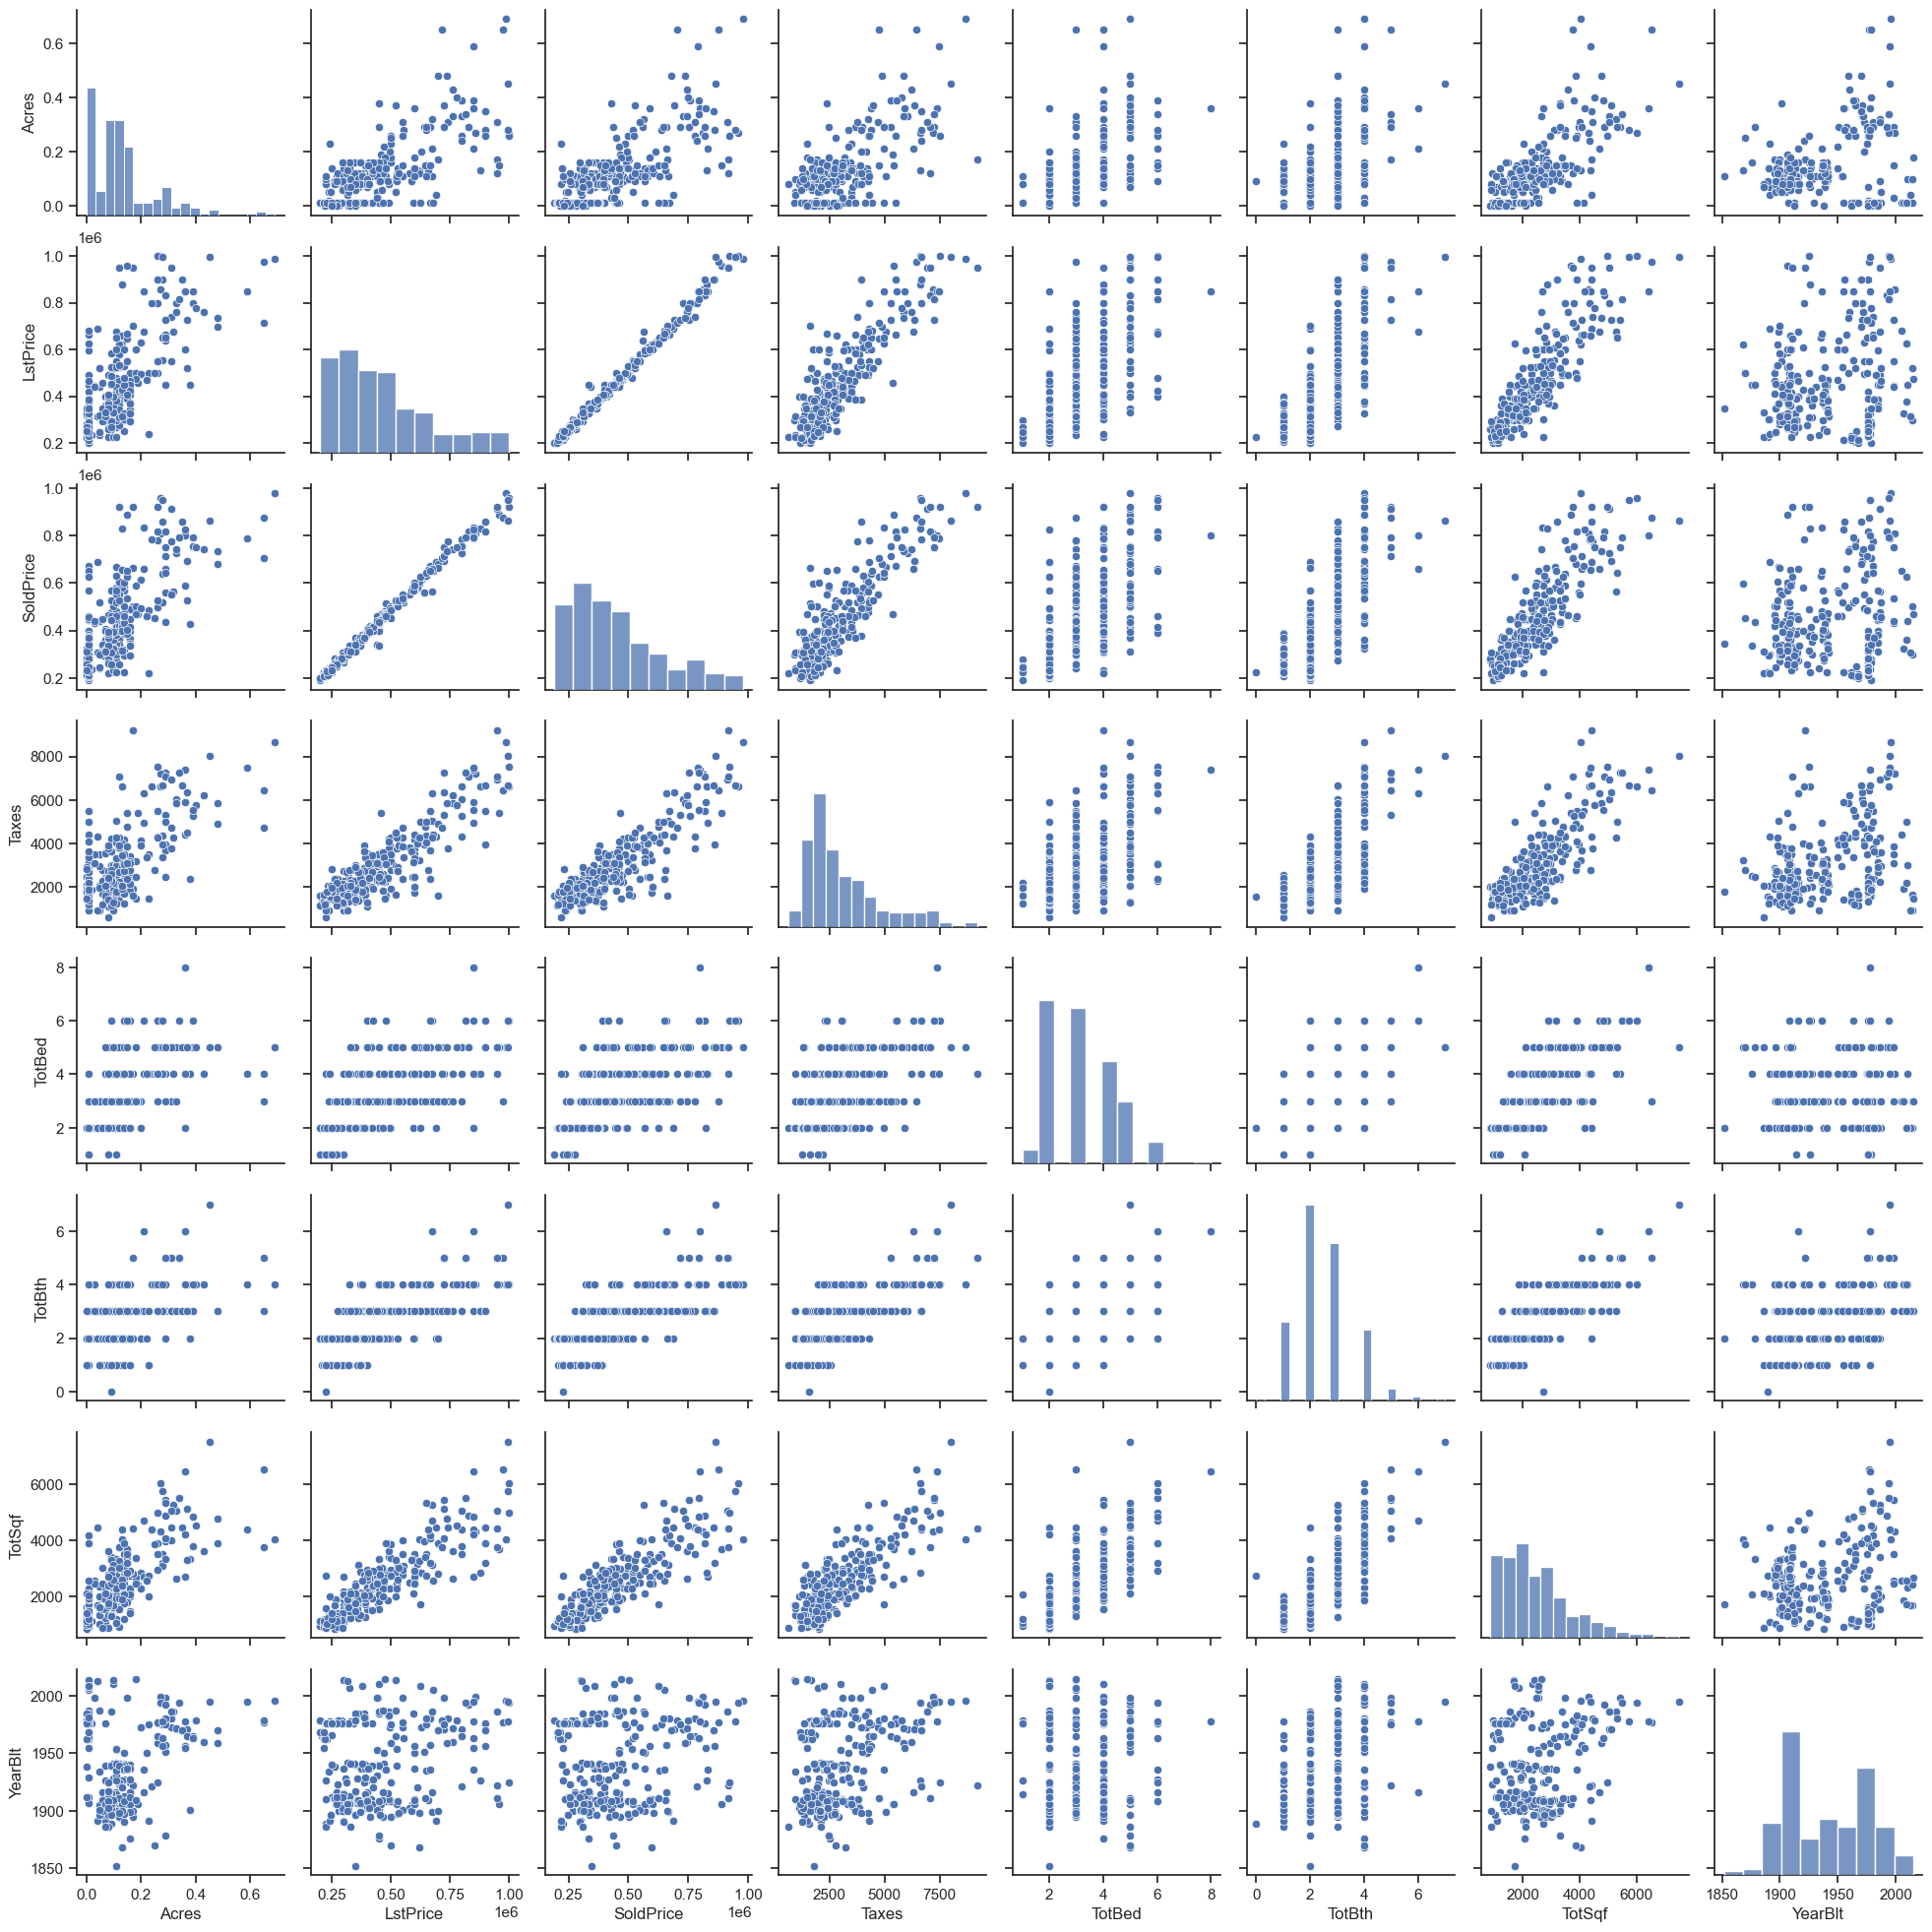

In [17]:
# Make a scatter plot matrix to visualize the correlations.

combinedSubset = relData[['Acres', 'LstPrice', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']]
sns.set_theme(style="ticks")
sns.pairplot(combinedSubset)
plt.show()

Determine which column has strong correlation:

The list price and sold price exhibit the strongest and most significant correlation, which is logical because ideally, a house should be listed at its market value and sold at a similar price. Although this is not always the case, it is the expected trend that should be reflected in the data.

There is also a strong correlation between list/sold prices and property taxes. This is understandable, as property taxes are based on the property value and the local tax rate. However, some variation is observed since, in Utah, the sold price of a home is not publicly disclosed. Consequently, the county cannot increase property taxes unless this information is provided directly.

Additionally, there is a strong correlation between list/sold prices and total square footage. This makes sense because, typically, larger houses cost more compared to smaller ones in the same area. However, factors such as general upkeep and renovations can influence this relationship.

## Task 4: Geospatial plot

<Axes: xlabel='Longitude', ylabel='Latitude'>

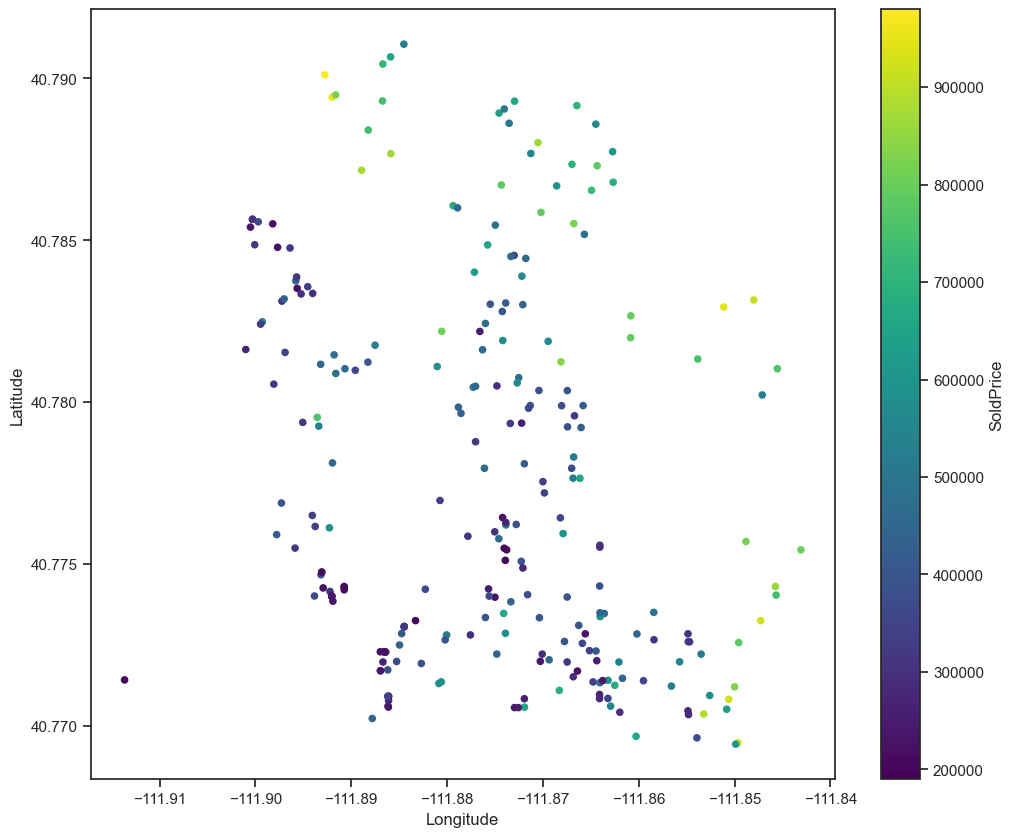

In [18]:
relData.plot.scatter(x='Longitude', y='Latitude', c='SoldPrice', cmap='viridis')

How does the price depend on the house location?

House prices are higher in northen and eastern part. 

## Task 5: Simple Linear Regression

In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit regression model (using the natural log of one of the regressors)
print("Fitting model for TotBth")
TotBth = smf.ols(formula='SoldPrice ~ TotBth', data=relData).fit()

print("Fitting model for TotBed")
TotBed = smf.ols(formula='SoldPrice ~ TotBed', data=relData).fit()

print("Fitting model for Taxes")
Taxes = smf.ols(formula='SoldPrice ~ Taxes', data=relData).fit()

print("Fitting model for YearBlt")
YearBlt = smf.ols(formula='SoldPrice ~ YearBlt', data=relData).fit()

print("Fitting model for LstPrice")
LstPrice = smf.ols(formula='SoldPrice ~ LstPrice', data=relData).fit()

# Inspect the results
print('\n\n********************************************************************************************* \n\n')
print(TotBth.summary())
print('\n\n*********************************************************************************************\n\n')
print(TotBed.summary())
print('\n\n********************************************************************************************* \n\n')
print(Taxes.summary())
print('\n\n********************************************************************************************* \n\n')
print(YearBlt.summary())
print('\n\n********************************************************************************************* \n\n')
print(LstPrice.summary())
print('\n\n********************************************************************************************* \n\n')


Fitting model for TotBth
Fitting model for TotBed
Fitting model for Taxes
Fitting model for YearBlt
Fitting model for LstPrice


********************************************************************************************* 


                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     288.0
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           7.69e-44
Time:                        14:00:33   Log-Likelihood:                -3417.8
No. Observations:                 259   AIC:                             6840.
Df Residuals:                     257   BIC:                             6847.
Df Model:                           1                                         
Covariance Type:            nonrobust                          

Report the R-squared value for this model (SoldPrice ~ LstPrice) and give an interpretation for its meaning:

The R squared value is 0.990.

The closer the R squared value is to 1, the stronger the correlation is. The current R squared value for SoldPrice ~ LstPrice of 0.990 is very close to 1, indicating a strong corelation between SoldPrice and LstPrice.

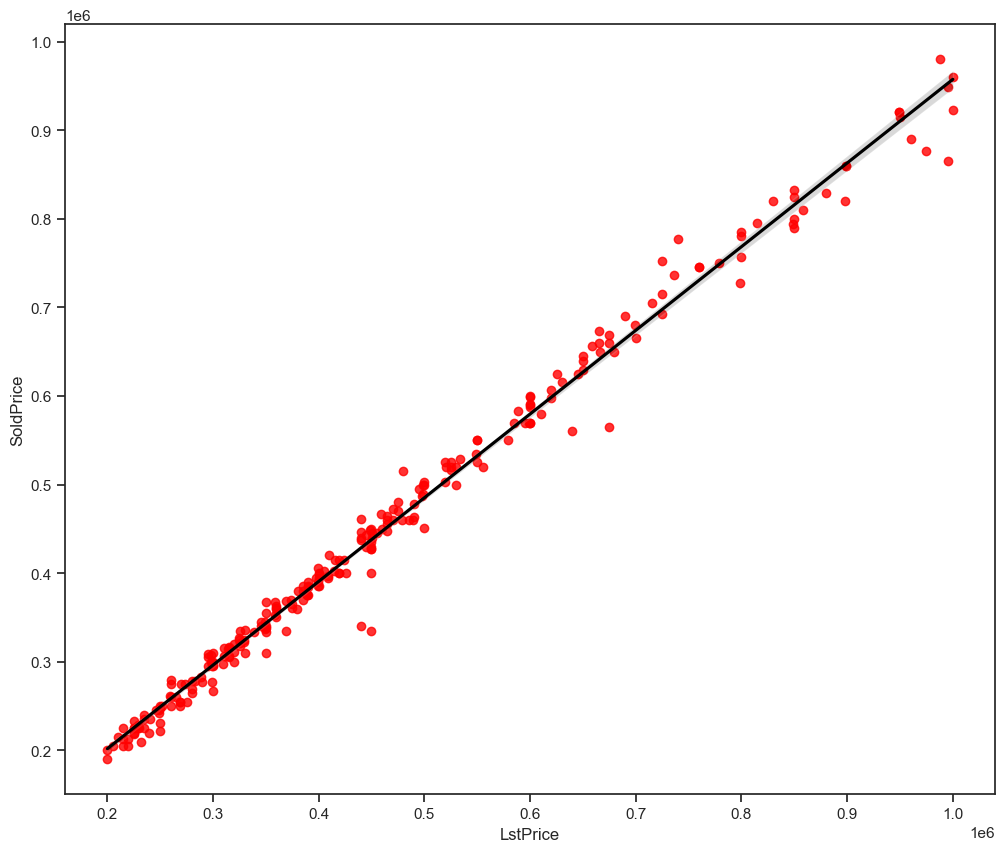

In [25]:
sns.regplot(x="LstPrice", y="SoldPrice", data=relData, scatter_kws={"color": "red"}, line_kws={"color": "black"})

# Show the plot
plt.show()

The plot is showing strong correlation between the listed price and the sold price as the line is accuratedly regretted. Although very close to 1, the coef of 0.9442 indicates that sold price will increase slower then listed price, which means the house will be sold slightly less then what it is list for.

## Task 6: Multilinear Regression

In [26]:
results = smf.ols(formula='SoldPrice ~ Acres + Taxes + TotSqf + Longitude', data=relData).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     334.2
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          6.83e-100
Time:                        16:17:07   Log-Likelihood:                -3277.5
No. Observations:                 259   AIC:                             6565.
Df Residuals:                     254   BIC:                             6583.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.342e+08   4.09e+07      3.278      0.0

1. Which variables are the best predictors for the Sold Price?

Acres, GaragCap, TotSqf, and Longitude can all be used as predictors as their p-values are less than 0.01. Among them, TotSqf may be the best predictor as it has the lowest standard error.

2. Often the price per square foot for a house is advertised. Is this what the coefficient for TotSqf is measuring? Provide an interpretation for the coefficient for TotSqf.

No. The coef indicates that for each sqft added, the price is estimated to increase about $72, assuming all other variables remain the same.

3. Estimate the value that each Garage space adds to a house:

Each garage space will add $36,220 to the price assuming all other variables remain the same.

4. Does latitude or longitude have an impact on house price? Explain:

Latitude has a p-value of 0.204 which is more than 0.05 changing the latitude of the house is not statistically significant on the change of the price. 
Longitude has a p-value of 0 which is less than 0.05 meaning the change to price due to longitude can be said to be statistically significant and that it does have an impact on price.

5. If we wanted to start a 'house flipping' company, we'd have to be able to do a better job of predicting the sold price than the list price does. How does your model compare?

List price is better at predicting the sold price when comparing with my model. The highest R-squared value i can get with my strongest predictors is 0.803, which is lower then the r-squared value of 0,99 when predicting with the list price. 

## Task 7: Incorporating a Categorical Variable

In [38]:
results = smf.ols(formula='SoldPrice ~ Prop_Type_SingleFamily', data=relData).fit()
results = smf.ols(formula='SoldPrice ~ Prop_Type_SingleFamily * TotSqf', data=relData).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     241.5
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           3.33e-74
Time:                        17:01:16   Log-Likelihood:                -3340.8
No. Observations:                 259   AIC:                             6690.
Df Residuals:                     255   BIC:                             6704.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

/Users/tailangcao/myGithubRepo/CS6017/HW2/myenv/lib/python3.12/site-packages/matplotlib/collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
/var/folders/h0/f9d5nsss0s14zm26734cgfg80000gn/T/ipykernel_62993/3933772969.py:8: UserWarning: Mismatched number of handles and labels: len(handles) = 0 len(labels) = 3
  ax.legend(handles=scatter.legend_elements()[0],
/var/folders/h0/f9d5nsss0s14zm26734cgfg80000gn/T/ipykernel_62993/3933772969.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(handles=scatter.legend_elements()[0],


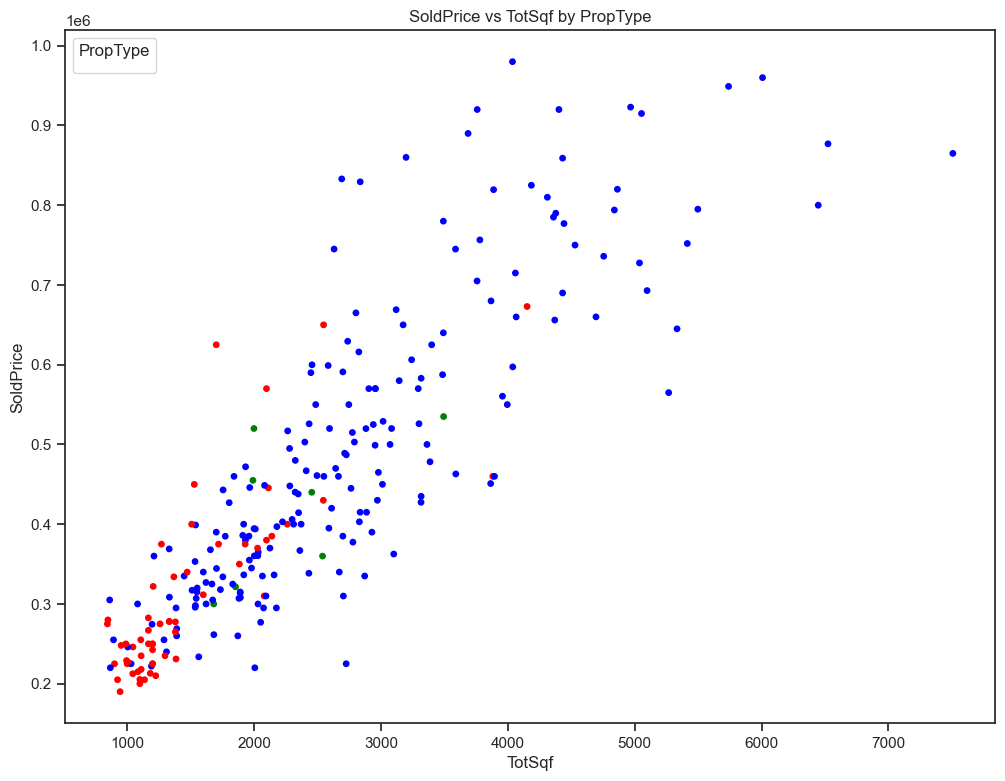

In [39]:
fig, ax = plt.subplots(figsize=(12,9))
ax.set_xlabel('TotSqf')
ax.set_ylabel('SoldPrice')
ax.set_title('SoldPrice vs TotSqf by PropType')
# colors = ['red', 'blue', 'green']
colors = {'Single Family':'blue', 'Condo':'red', 'Townhouse':'green'}
ax.scatter(x=relData['TotSqf'], y=relData['SoldPrice'], c=relData['PropType'].apply(lambda x: colors[x]), s=15)
ax.legend(handles=scatter.legend_elements()[0],
          loc="upper left",
          labels=['Condos', 'Single Family', 'Townhouse'], title="PropType")
plt.show()

From the first model, it would appear that Property type is significant in predicting the sold price. On the other hand, the second model indicates that when you take into account total square footage, property type is no longer predictive. Explain this. 

Total Square Footage (TotSqf) is a confounding variable that influences both Sold Price and Property Type. The scatter plot shows that condos have smaller square footage and lower prices, single-family homes vary widely in size and price, and townhomes fall in between. This means that square footage captures much of the variability in property type, making Property Type less predictive when TotSqf is included in the analysis.





